<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/master/ML3_TITANIC__Kaggle_competition_v2_DEFINITIVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns', None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')

In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [ ]:
#passengerId fuera
#Nombre lun()
#Ticket fuera
#CAbina nos quedamos solo con la letra

# ML Preprocessing

## Data cleaning

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados
* Eliminar filas sin target informado
* Eliminar columnas irrelevantes
* Corregir erratas en literales
* Corregir data types

In [ ]:
# Check duplicados (no hay outlayers)
df[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#check for outlayers
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
del df["PassengerId"]
del df["Ticket"]

In [ ]:
# Longitud nombre
df['Long_name']=df['Name'].str.len()

In [ ]:
# Primera letra cabina
df['Cabin'] = df['Cabin'].str[0]

In [ ]:
# Numero de palabras
df['n_palabras_name']=df["Name"].apply(lambda n: len(n.split()))

In [ ]:
del df['Name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              714 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Cabin            204 non-null    object 
 8   Embarked         889 non-null    object 
 9   Long_name        891 non-null    int64  
 10  n_palabras_name  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
df["Survived"].unique()

array([0, 1])

In [ ]:
df.head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Long_name,n_palabras_name
0,0,3,male,22.0,1,0,7.2500,NaN,S,23,4
1,1,1,female,38.0,1,0,71.2833,C,C,51,7
2,1,3,female,26.0,0,0,7.9250,NaN,S,22,3
3,1,1,female,35.0,1,0,53.1000,C,S,44,7
4,0,3,male,35.0,0,0,8.0500,NaN,S,24,4
...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,NaN,S,27,4
96,0,1,male,71.0,0,0,34.6542,A,C,25,4
97,1,1,male,23.0,0,1,63.3583,D,C,31,4
98,1,2,female,34.0,0,1,23.0000,NaN,S,36,7


In [ ]:
map_values = {
    'male': 0,
    'female': 1,
}
df['Sex_int'] = df['Sex'].map(map_values)

In [ ]:
df["Cabin"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
#Variables ordinales se pueden clasear
map_values = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': -999
}
df['Cabin_int'] = df['Cabin'].map(map_values)

In [ ]:
del df["Sex"]
del df["Cabin"]

In [ ]:
df.head(100)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Long_name,n_palabras_name,Sex_int,Cabin_int
0,0,3,22.0,1,0,7.2500,S,23,4,0,NaN
1,1,1,38.0,1,0,71.2833,C,51,7,1,3.0
2,1,3,26.0,0,0,7.9250,S,22,3,1,NaN
3,1,1,35.0,1,0,53.1000,S,44,7,1,3.0
4,0,3,35.0,0,0,8.0500,S,24,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,NaN,0,0,8.0500,S,27,4,0,NaN
96,0,1,71.0,0,0,34.6542,C,25,4,0,1.0
97,1,1,23.0,0,1,63.3583,C,31,4,0,4.0
98,1,2,34.0,0,1,23.0000,S,36,7,1,NaN


## EDA

In [ ]:
#primera vista a posibles outlayers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Long_name,891.0,26.965208,9.281607,12.00,20.0000,25.0000,30.0,82.0000
n_palabras_name,891.0,4.067340,1.168866,3.00,3.0000,4.0000,4.0,14.0000
Sex_int,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Cabin_int,204.0,-1.544118,70.194684,-999.00,2.0000,3.0000,4.0,7.0000


Analisis de las distribuciones de las variables.

[[<Axes: title={'center': 'Survived'}>]]
[[<Axes: title={'center': 'Pclass'}>]]
[[<Axes: title={'center': 'Age'}>]]
[[<Axes: title={'center': 'SibSp'}>]]
[[<Axes: title={'center': 'Parch'}>]]
[[<Axes: title={'center': 'Fare'}>]]
Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64 

[[<Axes: title={'center': 'Long_name'}>]]
[[<Axes: title={'center': 'n_palabras_name'}>]]
[[<Axes: title={'center': 'Sex_int'}>]]
[[<Axes: title={'center': 'Cabin_int'}>]]


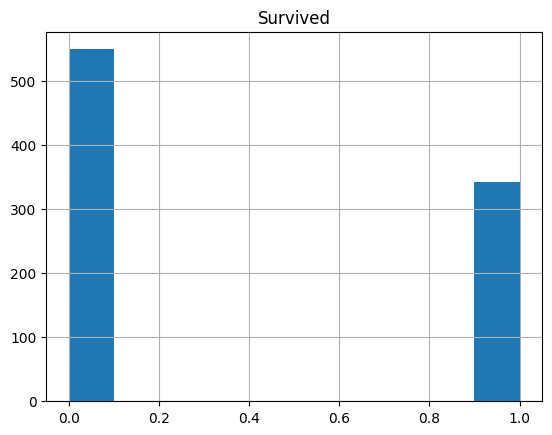

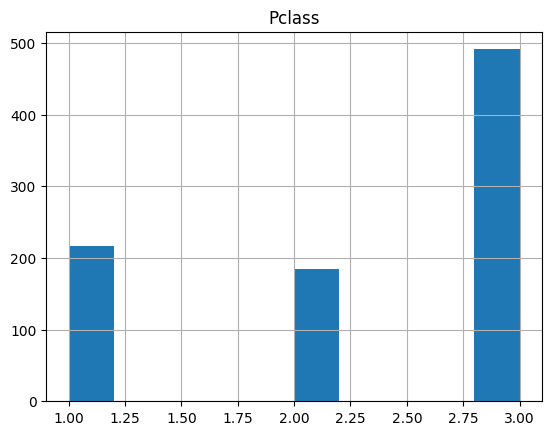

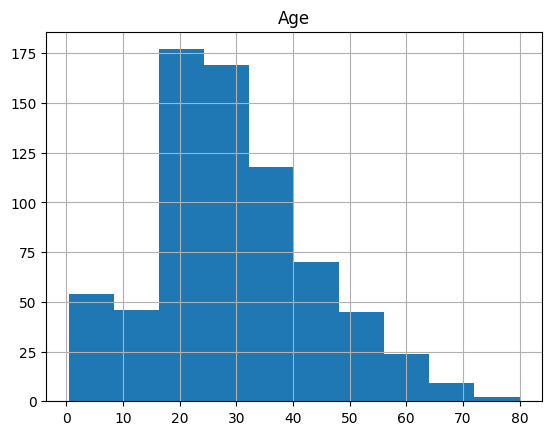

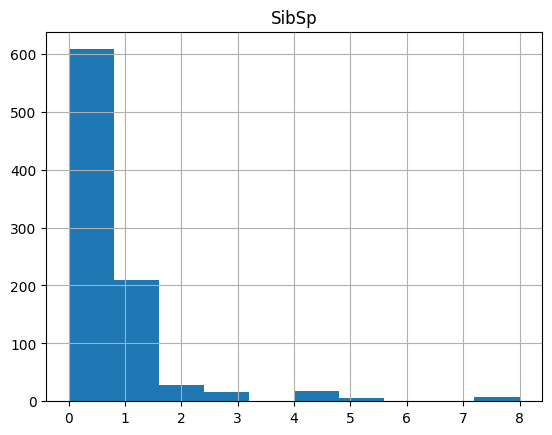

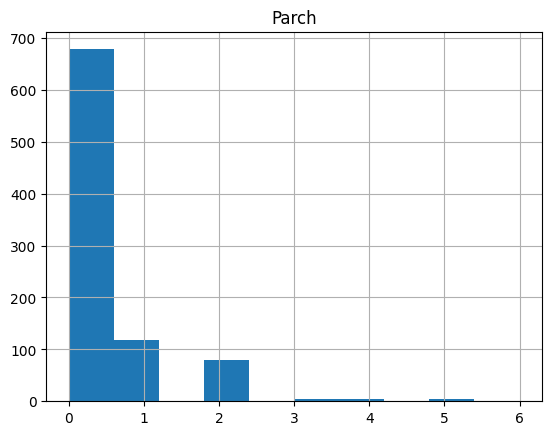

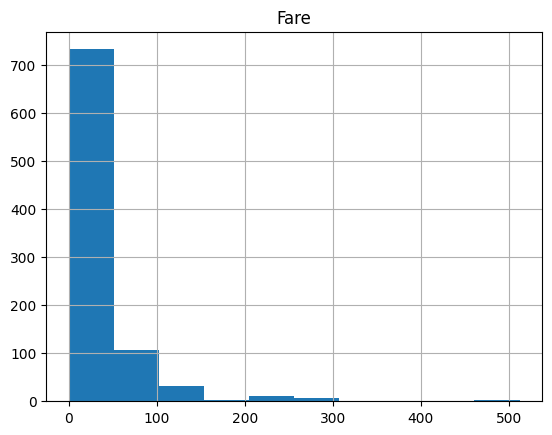

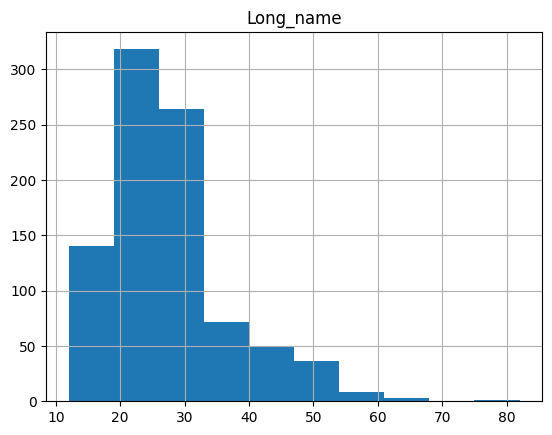

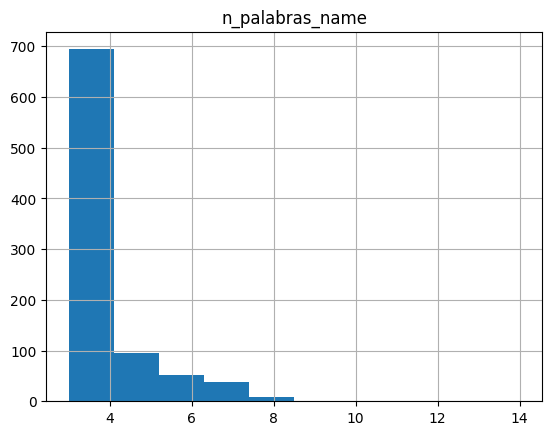

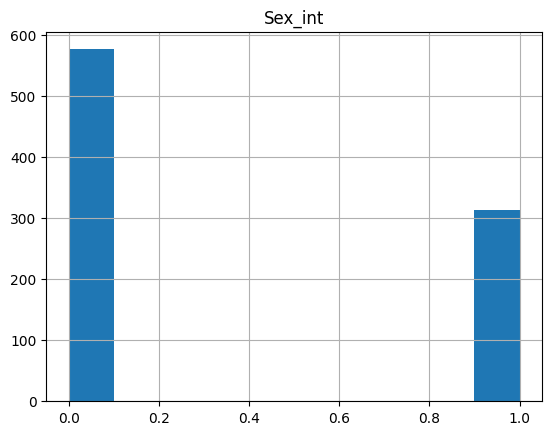

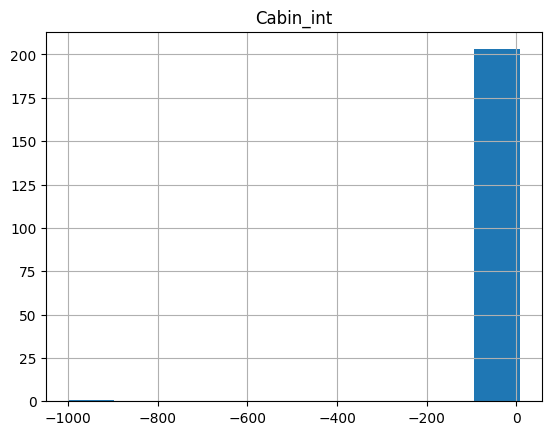

In [ ]:
 for i in df:
  if (df[i].dtype.kind=="f") or (df[i].dtype.kind=="i"):
    print(df.hist(i))
  elif df[i].dtype.kind == "O":
    print(i,'\n', df[i].value_counts(), '\n')

## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df.isnull().sum()

Survived             0
Pclass               0
Age                177
SibSp                0
Parch                0
Fare                 0
Embarked             2
Long_name            0
n_palabras_name      0
Sex_int              0
Cabin_int          687
dtype: int64

In [ ]:
df['Cabin_int'].fillna(-999, inplace = True)
df['Embarked'].fillna('Unknown', inplace = True)

In [ ]:
Med_primera_hombres=df["Age"][(df["Pclass"]==1) & (df['Sex_int']==0) ].mean()
Med_primera_mujeres=df["Age"][(df["Pclass"]==1) & (df['Sex_int']==1) ].mean()
Med_segunda_hombres=df["Age"][(df["Pclass"]==2) & (df['Sex_int']==0) ].mean()
Med_segunda_mujeres=df["Age"][(df["Pclass"]==2) & (df['Sex_int']==1) ].mean()
Med_tercera_hombres=df["Age"][(df["Pclass"]==3) & (df['Sex_int']==0) ].mean()
Med_tercera_mujeres=df["Age"][(df["Pclass"]==3) & (df['Sex_int']==1) ].mean()
df["Age"][(df['Pclass'] == 1) & (df['Sex_int']==0) & (df['Age'].isnull())]=Med_primera_hombres
df["Age"][(df['Pclass'] == 1) & (df['Sex_int']==1) & (df['Age'].isnull())]=Med_primera_mujeres
df["Age"][(df['Pclass'] == 2) & (df['Sex_int']==0) & (df['Age'].isnull())]=Med_segunda_hombres
df["Age"][(df['Pclass'] == 2) & (df['Sex_int']==1) & (df['Age'].isnull())]=Med_segunda_mujeres
df["Age"][(df['Pclass'] == 3) & (df['Sex_int']==0) & (df['Age'].isnull())]=Med_tercera_hombres
df["Age"][(df['Pclass'] == 3) & (df['Sex_int']==1) & (df['Age'].isnull())]=Med_tercera_mujeres

In [ ]:
df.isnull().sum()

Survived           0
Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Long_name          0
n_palabras_name    0
Sex_int            0
Cabin_int          0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Long_name,n_palabras_name,Sex_int,Cabin_int
0,0,3,22.0,1,0,7.2500,S,23,4,0,-999.0
1,1,1,38.0,1,0,71.2833,C,51,7,1,3.0
2,1,3,26.0,0,0,7.9250,S,22,3,1,-999.0
3,1,1,35.0,1,0,53.1000,S,44,7,1,3.0
4,0,3,35.0,0,0,8.0500,S,24,4,0,-999.0


## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
df= pd.get_dummies(data=df, columns=['Embarked'])

In [ ]:
df.shape

(891, 14)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Long_name,n_palabras_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,0,3,22.0,1,0,7.2500,23,4,0,-999.0,0,0,1,0
1,1,1,38.0,1,0,71.2833,51,7,1,3.0,1,0,0,0
2,1,3,26.0,0,0,7.9250,22,3,1,-999.0,0,0,1,0
3,1,1,35.0,1,0,53.1000,44,7,1,3.0,0,0,1,0
4,0,3,35.0,0,0,8.0500,24,4,0,-999.0,0,0,1,0


## Eliminar alta correlación

In [ ]:
corr_matrix=df.corr()

In [ ]:
corr_matrix.style.background_gradient(cmap="coolwarm")

,Survived,Pclass,Age,SibSp,Parch,Fare,Long_name,n_palabras_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
Survived,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307,0.332350,0.276512,0.543351,0.319603,0.168240,0.003650,-0.155660,0.060095
Pclass,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500,-0.220001,-0.221348,-0.131900,-0.722302,-0.243292,0.221009,0.081720,-0.074282
Age,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308,0.041739,0.071073,-0.112851,0.269110,0.041504,-0.084069,0.008690,0.073901
SibSp,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651,0.165019,0.141757,0.114631,-0.039239,-0.059528,-0.026354,0.070941,-0.022508
Parch,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225,0.252282,0.215977,0.245489,0.038342,-0.011069,-0.081228,0.063036,-0.022467
Fare,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000,0.155832,0.152981,0.182333,0.482384,0.269335,-0.117216,-0.166603,0.045646
Long_name,0.332350,-0.220001,0.041739,0.165019,0.252282,0.155832,1.000000,0.922586,0.448759,0.190945,0.027481,-0.140941,0.062817,0.015517
n_palabras_name,0.276512,-0.221348,0.071073,0.141757,0.215977,0.152981,0.922586,1.000000,0.375778,0.183965,0.021336,-0.147658,0.072186,0.017567
Sex_int,0.543351,-0.131900,-0.112851,0.114631,0.245489,0.182333,0.448759,0.375778,1.000000,0.142687,0.082853,0.074115,-0.125722,0.064296
Cabin_int,0.319603,-0.722302,0.269110,-0.039239,0.038342,0.482384,0.190945,0.183965,0.142687,1.000000,0.209936,-0.128940,-0.111728,0.087165


In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida para encontrar la máxima correlación
target = 'Survived'
features = df.columns[df.columns != target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
#Función de detección alta correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.90)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,n_palabras_name,Long_name,0.922586,0.276512,0.33235,n_palabras_name


In [ ]:
del df['n_palabras_name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Age               891 non-null    float64
 3   SibSp             891 non-null    int64  
 4   Parch             891 non-null    int64  
 5   Fare              891 non-null    float64
 6   Long_name         891 non-null    int64  
 7   Sex_int           891 non-null    int64  
 8   Cabin_int         891 non-null    float64
 9   Embarked_C        891 non-null    uint8  
 10  Embarked_Q        891 non-null    uint8  
 11  Embarked_S        891 non-null    uint8  
 12  Embarked_Unknown  891 non-null    uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 66.3 KB


## Eliminar mínima varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas prácticamente constantes (nula varianza), si el 99% de los valores son iguales este step te los filtra
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

1  low variance features were removed:
 ['Embarked_Unknown']


In [ ]:
del df['Embarked_Unknown']

# Split X-y

In [ ]:
target = 'Survived'
features = df.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Long_name', 'Sex_int', 'Cabin_int', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


# Target distribution

[]

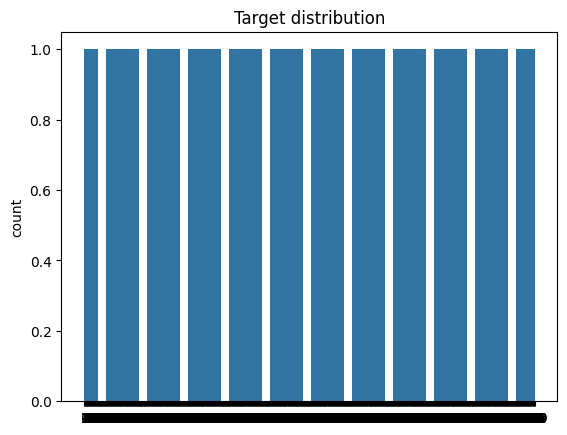

In [ ]:
sns.countplot(df[target])
plt.title('Target distribution')
plt.plot()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Estandarización: fit_transform() en train, transform() en test, estandard scaling se usa cuando los datos no sean tan sensibles a outlayers
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Long_name   891 non-null    int64  
 6   Sex_int     891 non-null    int64  
 7   Cabin_int   891 non-null    float64
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 58.4 KB


In [ ]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Long_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,23,0,-999.0,0,0,1
1,1,38.0,1,0,71.2833,51,1,3.0,1,0,0
2,3,26.0,0,0,7.9250,22,1,-999.0,0,0,1


In [ ]:
X_train_std.head(3)

,Pclass,Age,SibSp,Parch,Fare,Long_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.551366,0.432793,-0.473674,-0.502445,-0.427451,-0.737695,-0.543192,-0.482043,-0.307562,0.619306
1,-1.566107,0.654030,0.432793,-0.473674,0.786845,2.590962,1.355574,1.840087,2.074505,-0.307562,-1.614710
2,0.827377,-0.250017,-0.474545,-0.473674,-0.488854,-0.535252,1.355574,-0.543192,-0.482043,-0.307562,0.619306


# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
evaluate_classification(model = LogisticRegression(),X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.86649,0.857558


In [ ]:
#mucho overfiting
evaluate_classification(model = RandomForestClassifier(),X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999971,0.863256
0,LogisticRegression(),0.866490,0.857558


In [ ]:
evaluate_classification(model = XGBClassifier(),X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999971,0.863256
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370


In [ ]:
evaluate_classification(model = LGBMClassifier(),X=X_train, y=y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Info] Number of positive: 257, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 11
[LightGBM] [Info] [binary:BoostF

,Model,AUC Train,AUC Cross-Valida
1,RandomForestClassifier(),0.999971,0.863256
3,LGBMClassifier(),0.999057,0.862021
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370


In [ ]:
#diferencia entre validación y train alta es por el overfitting
evaluate_classification(model = KNeighborsClassifier(),X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,GradientBoostingClassifier(),0.952335,0.872652
1,RandomForestClassifier(),0.999971,0.863256
3,LGBMClassifier(),0.999057,0.862021
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370
5,KNeighborsClassifier(),0.930328,0.838442


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_classification(model = GradientBoostingClassifier(),X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
4,GradientBoostingClassifier(),0.952335,0.872652
6,GradientBoostingClassifier(),0.952335,0.872459
1,RandomForestClassifier(),0.999971,0.863256
3,LGBMClassifier(),0.999057,0.862021
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370
5,KNeighborsClassifier(),0.930328,0.838442


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_classification(model = GradientBoostingClassifier(),X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
7,GradientBoostingClassifier(),0.952335,0.872716
4,GradientBoostingClassifier(),0.952335,0.872652
6,GradientBoostingClassifier(),0.952335,0.872459
1,RandomForestClassifier(),0.999971,0.863256
3,LGBMClassifier(),0.999057,0.862021
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370
5,KNeighborsClassifier(),0.930328,0.838442


In [ ]:
from sklearn.tree import DecisionTreeClassifier
evaluate_classification(model = DecisionTreeClassifier(),X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
7,GradientBoostingClassifier(),0.952335,0.872716
4,GradientBoostingClassifier(),0.952335,0.872652
6,GradientBoostingClassifier(),0.952335,0.872459
1,RandomForestClassifier(),0.999971,0.863256
3,LGBMClassifier(),0.999057,0.862021
0,LogisticRegression(),0.866490,0.857558
2,"XGBClassifier(base_score=None, booster=None, c...",0.999625,0.849370
5,KNeighborsClassifier(),0.930328,0.838442
8,DecisionTreeClassifier(),0.999976,0.763282


## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definición de parámetros para RandomizedSearchCV
parameters_hp = {
    'learning_rate': [0.05, 0.1, 0.2],  # Tasas de aprendizaje sugeridas
    'max_depth': [3, 4, 5],  # Profundidades máximas sugeridas
    'n_estimators': [100, 150, 200],  # Número de árboles sugeridos
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras para entrenar cada árbol
    'min_samples_split': [2, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 5, 10],  # Número mínimo de muestras requeridas para ser una hoja
    'max_features': ['sqrt', 'log2', 'auto']  # Número de características a considerar para la mejor división
}

In [ ]:
# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),  # Estimador GradientBoostingClassifier
    param_distributions=parameters_hp,
    scoring='roc_auc',  # Métrica a optimizar: AUC
    cv=5,  # Número de folds para cross-validation
    n_iter=50,  # Número de iteraciones, cada una testeará una configuración distinta
    n_jobs=-1,  # Utilizar todos los procesadores disponibles
    verbose=True
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=True)

In [ ]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_features='auto',
                           min_samples_leaf=10, min_samples_split=10,
                           random_state=42, subsample=0.8)

In [ ]:
random_search.best_score_

0.87423049863235

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", random_search.best_estimator_)
print("\n The best AUC:", -random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: GradientBoostingClassifier(learning_rate=0.05, max_features='auto',
                           min_samples_leaf=10, min_samples_split=10,
                           random_state=42, subsample=0.8)

 The best AUC: -0.87423049863235

 The best parameters across ALL searched params:
 {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.05}


## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = random_search.best_estimator_
random_search

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=True)

In [ ]:
model = random_search.best_estimator_
model

GradientBoostingClassifier(learning_rate=0.05, max_features='auto',
                           min_samples_leaf=10, min_samples_split=10,
                           random_state=42, subsample=0.8)

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_test.csv')
print(X_pred)
X_pred.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_pred.shape

(418, 11)

In [ ]:
X_pred.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Model features

In [ ]:
#features_model =  list(best_model.feature_name_)
#print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

#En random forest lo conseguimos más abajo

## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
# Check duplicados (no hay outlayers)
X_pred[X_pred.duplicated(keep=False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#hacemos una copia para rescatar después el PassengerID
X_pred_original=X_pred.copy()

In [ ]:
X_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Hay un fare null, de que clase?
X_pred[X_pred["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
#buscamos la media de los pasajes de 3era y se lo asignamos
media_fare_3a=X_pred["Fare"][X_pred["Pclass"]==3].mean()

In [ ]:
X_pred["Fare"][(X_pred["Fare"].isnull()) & (X_pred["Pclass"]==3)]= media_fare_3a

In [ ]:
#verificamos nulos
X_pred.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#verificamos nulos
X_pred.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
del X_pred["Ticket"]

In [ ]:
X_pred['Long_name']=X_pred['Name'].str.len()

In [ ]:
map_values = {
    'male': 0,
    'female': 1,
}
X_pred['Sex_int'] = X_pred['Sex'].map(map_values)

In [ ]:
Med_primera_hombres=X_pred["Age"][(X_pred["Pclass"]==1) & (X_pred['Sex_int']==0) ].mean()
Med_primera_mujeres=X_pred["Age"][(X_pred["Pclass"]==1) & (X_pred['Sex_int']==1) ].mean()
Med_segunda_hombres=X_pred["Age"][(X_pred["Pclass"]==2) & (X_pred['Sex_int']==0) ].mean()
Med_segunda_mujeres=X_pred["Age"][(X_pred["Pclass"]==2) & (X_pred['Sex_int']==1) ].mean()
Med_tercera_hombres=X_pred["Age"][(X_pred["Pclass"]==3) & (X_pred['Sex_int']==0) ].mean()
Med_tercera_mujeres=X_pred["Age"][(X_pred["Pclass"]==3) & (X_pred['Sex_int']==1) ].mean()
X_pred["Age"][(X_pred['Pclass'] == 1) & (X_pred['Sex_int']==0) & (X_pred['Age'].isnull())]=Med_primera_hombres
X_pred["Age"][(X_pred['Pclass'] == 1) & (X_pred['Sex_int']==1) & (X_pred['Age'].isnull())]=Med_primera_mujeres
X_pred["Age"][(X_pred['Pclass'] == 2) & (X_pred['Sex_int']==0) & (X_pred['Age'].isnull())]=Med_segunda_hombres
X_pred["Age"][(X_pred['Pclass'] == 2) & (X_pred['Sex_int']==1) & (X_pred['Age'].isnull())]=Med_segunda_mujeres
X_pred["Age"][(X_pred['Pclass'] == 3) & (X_pred['Sex_int']==0) & (X_pred['Age'].isnull())]=Med_tercera_hombres
X_pred["Age"][(X_pred['Pclass'] == 3) & (X_pred['Sex_int']==1) & (X_pred['Age'].isnull())]=Med_tercera_mujeres

In [ ]:
X_pred['Cabin'] = X_pred['Cabin'].str[0]

In [ ]:
# Numero de palabras
X_pred['n_palabras_name']=X_pred["Name"].apply(lambda n: len(n.split()))

In [ ]:
del X_pred['Name']

In [ ]:
map_values = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'T': -999
}
X_pred['Cabin_int'] = X_pred['Cabin'].map(map_values)

In [ ]:
del X_pred["Sex"]
del X_pred["Cabin"]

In [ ]:
X_pred['Cabin_int'].fillna(-999, inplace = True)
X_pred['Embarked'].fillna('Unknown', inplace = True)

In [ ]:
X_pred= pd.get_dummies(data=X_pred, columns=['Embarked'])

In [ ]:
del X_pred['n_palabras_name']
del X_pred["PassengerId"]

In [ ]:
X_pred.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Long_name', 'Sex_int',
       'Cabin_int', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
features_model =  list(X_pred.columns)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Long_name', 'Sex_int', 'Cabin_int', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 11
Variables en modelos: 11
¿Match?: True


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 []


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 11
Variables en modelos: 11
¿Match?: True


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

In [ ]:
X_pred.head(10)

,Pclass,Age,SibSp,Parch,Fare,Long_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,16,0,-999.0,0,1,0
1,3,47.0,1,0,7.0000,32,1,-999.0,0,0,1
2,2,62.0,0,0,9.6875,25,0,-999.0,0,1,0
3,3,27.0,0,0,8.6625,16,0,-999.0,0,0,1
4,3,22.0,1,1,12.2875,44,1,-999.0,0,0,1
5,3,14.0,0,0,9.2250,26,0,-999.0,0,0,1
6,3,30.0,0,0,7.6292,20,1,-999.0,0,1,0
7,2,26.0,1,1,29.0000,28,0,-999.0,0,0,1
8,3,18.0,0,0,7.2292,41,1,-999.0,1,0,0
9,3,21.0,2,0,24.1500,23,0,-999.0,0,0,1


## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

In [ ]:
#verificamos target
target

'Survived'

In [ ]:
# Estandarización: fit_transform() en train, transform() en test, estandard scaling se usa cuando los datos no sean tan sensibles a outlayers
# Mismo analisis, pero desde una funcion que nos facilita la vida para encontrar la máxima correlación

features = X_pred.columns[X_pred.columns != target]
features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Long_name', 'Sex_int',
       'Cabin_int', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
# Estandarización: fit_transform() en train, transform() en test, estandard scaling se usa cuando los datos no sean tan sensibles a outlayers
# Mismo analisis, pero desde una funcion que nos facilita la vida para encontrar la máxima correlación

features = X_pred.columns[X_pred.columns != target]

# Divide dataset en matriz de variables (X) y output (y) (y es la predicción, no hace falta)
X = X_pred[features]

In [ ]:
#nos basamos en el mismo scaler ya hecho en el train

#hacemos un transforms
X_pred_std = scaler.transform(X_pred)

In [ ]:
X_pred_std = pd.DataFrame(X_pred_std, columns = X_pred.columns, index= X_pred.index)

In [ ]:
X_pred.head(3)

,Pclass,Age,SibSp,Parch,Fare,Long_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,16,0,-999.0,0,1,0
1,3,47.0,1,0,7.0000,32,1,-999.0,0,0,1
2,2,62.0,0,0,9.6875,25,0,-999.0,0,1,0


In [ ]:
X_pred_std.head(3)

,Pclass,Age,SibSp,Parch,Fare,Long_name,Sex_int,Cabin_int,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,0.390349,-0.474545,-0.473674,-0.490783,-1.182055,-0.737695,-0.543192,-0.482043,3.251373,-1.614710
1,0.827377,1.332065,0.432793,-0.473674,-0.507479,0.542753,1.355574,-0.543192,-0.482043,-0.307562,0.619306
2,-0.369365,2.462123,-0.474545,-0.473674,-0.453367,-0.211850,-0.737695,-0.543192,-0.482043,3.251373,-1.614710


## Predictions

In [ ]:
predictions =  model.predict(X_pred)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred.index)

In [ ]:
submission.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [ ]:
#Añadimos el PassengerID como index
PassengerId=pd.DataFrame(X_pred_original,columns=['PassengerId'],index = X_pred_original.index)

In [ ]:
PassengerId.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [ ]:
submission=pd.concat([PassengerId, submission], axis=1)

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/predictionstitanic.csv',index=False)